In [94]:
import pandas as pd
import numpy as np
import sklearn as sk
import matplotlib.pyplot as plt
from sklearn import ensemble
from sklearn import model_selection
from sklearn import metrics
import datetime

In [2]:
df = pd.read_csv('Historical Product Demand.csv')

In [3]:
df.head(10)

,Product_Code,Warehouse,Product_Category,Date,Order_Demand
0,Product_0993,Whse_J,Category_028,2012/7/27,100
1,Product_0979,Whse_J,Category_028,2012/1/19,500
2,Product_0979,Whse_J,Category_028,2012/2/3,500
3,Product_0979,Whse_J,Category_028,2012/2/9,500
4,Product_0979,Whse_J,Category_028,2012/3/2,500
5,Product_0979,Whse_J,Category_028,2012/4/19,500
6,Product_0979,Whse_J,Category_028,2012/6/5,500
7,Product_0979,Whse_J,Category_028,2012/6/27,500
8,Product_0979,Whse_J,Category_028,2012/7/23,500
9,Product_0979,Whse_J,Category_028,2012/8/29,500


In [4]:
df.Product_Code.nunique()

2160

In [5]:
df.Product_Code.value_counts()

Product_1359    16936
Product_1295    10575
Product_1378     9770
Product_0620     9428
Product_1286     8888
Product_1382     8619
Product_1453     8503
Product_1294     8384
Product_1377     7872
Product_1287     7829
Product_1274     7048
Product_1016     6571
Product_1248     6348
Product_0613     6079
Product_1241     5476
Product_1456     5442
Product_1470     5159
Product_0031     5035
Product_1410     4995
Product_0608     4803
Product_1360     4801
Product_1451     4703
Product_1250     4655
Product_1381     4583
Product_1264     4523
Product_0033     4479
Product_1262     4478
Product_1452     4462
Product_1023     4381
Product_1463     4331
                ...  
Product_0647       11
Product_1595       11
Product_0237       10
Product_1619       10
Product_1793       10
Product_1525        9
Product_1915        9
Product_0360        8
Product_1019        7
Product_2009        7
Product_0577        7
Product_0240        7
Product_0244        7
Product_0438        6
Product_21

In [6]:
product = df[df.Product_Code == 'Product_1359'].copy()

In [7]:
product.reset_index(inplace = True)

In [8]:
product.Warehouse.nunique()

1

In [9]:
#Warehouse is worthless
product 
product.drop('Warehouse', axis = 1, inplace = True)

In [10]:
product['DateTime'] = pd.to_datetime(product.Date)

In [11]:
product.sort_values(by = 'DateTime', inplace = True)

In [12]:
product.head()

,index,Product_Code,Product_Category,Date,Order_Demand,DateTime
2465,59646,Product_1359,Category_019,2012/1/5,1000,2012-01-05
2671,63099,Product_1359,Category_019,2012/1/5,5000,2012-01-05
38,2577,Product_1359,Category_019,2012/1/5,2000,2012-01-05
1435,32610,Product_1359,Category_019,2012/1/5,10000,2012-01-05
1745,46739,Product_1359,Category_019,2012/1/5,5000,2012-01-05


In [13]:
product.head()

,index,Product_Code,Product_Category,Date,Order_Demand,DateTime
2465,59646,Product_1359,Category_019,2012/1/5,1000,2012-01-05
2671,63099,Product_1359,Category_019,2012/1/5,5000,2012-01-05
38,2577,Product_1359,Category_019,2012/1/5,2000,2012-01-05
1435,32610,Product_1359,Category_019,2012/1/5,10000,2012-01-05
1745,46739,Product_1359,Category_019,2012/1/5,5000,2012-01-05


In [14]:
product.Order_Demand.unique()

array(['1000 ', '5000 ', '2000 ', '10000 ', '300000 ', '150000 ',
       '100000 ', '25000 ', '16000 ', '50000 ', '30000 ', '112000 ',
       '9000 ', '20000 ', '13000 ', '37000 ', '4000 ', '17000 ', '72000 ',
       '63000 ', '3000 ', '40000 ', '200000 ', '75000 ', '28000 ',
       '12000 ', '6000 ', '84000 ', '43000 ', '0 ', '8000 ', '104000 ',
       '14000 ', '15000 ', '41000 ', '18000 ', '33000 ', '85000 ',
       '7000 ', '39000 ', '(1000)', '750000 ', '34000 ', '105000 ',
       '225000 ', '60000 ', '80000 ', '500000 ', '56000 ', '58000 ',
       '29000 ', '35000 ', '24000 ', '54000 ', '144000 ', '51000 ',
       '(10000)', '(50000)', '21000 ', '27000 ', '38000 ', '45000 ',
       '160000 ', '31000 ', '134000 ', '32000 ', '11000 ', '65000 ',
       '36000 ', '46000 ', '86000 ', '70000 ', '26000 ', '61000 ',
       '64000 ', '(75000)', '82000 ', '155000 ', '250000 ', '23000 ',
       '74000 ', '83000 ', '266000 ', '525000 ', '550000 ', '19000 ',
       '88000 ', '49000 ', '22000 

In [15]:
product[product.Order_Demand == '(15000)']

,index,Product_Code,Product_Category,Date,Order_Demand,DateTime
16879,1033756,Product_1359,Category_019,2016/10/24,(15000),2016-10-24


In [16]:
product.Order_Demand.drop(16879, inplace = True)

In [17]:
product['Order_Demand'] = product['Order_Demand'].str.replace("(","") 

In [18]:
product['Order_Demand'] = product['Order_Demand'].str.replace(")","") 

In [19]:
product['Order_Demand'] = product['Order_Demand'].astype('float')

In [20]:
product

,index,Product_Code,Product_Category,Date,Order_Demand,DateTime
2465,59646,Product_1359,Category_019,2012/1/5,1000.0,2012-01-05
2671,63099,Product_1359,Category_019,2012/1/5,5000.0,2012-01-05
38,2577,Product_1359,Category_019,2012/1/5,2000.0,2012-01-05
1435,32610,Product_1359,Category_019,2012/1/5,10000.0,2012-01-05
1745,46739,Product_1359,Category_019,2012/1/5,5000.0,2012-01-05
3157,78867,Product_1359,Category_019,2012/1/5,5000.0,2012-01-05
806,14860,Product_1359,Category_019,2012/1/5,300000.0,2012-01-05
3614,169706,Product_1359,Category_019,2012/1/5,2000.0,2012-01-05
1182,20412,Product_1359,Category_019,2012/1/5,150000.0,2012-01-05
2207,52968,Product_1359,Category_019,2012/1/5,5000.0,2012-01-05


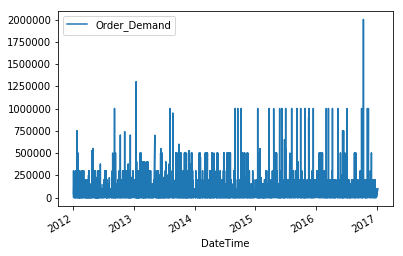

In [21]:
product.plot(x = 'DateTime', y = 'Order_Demand')

In [22]:
product.drop('Product_Code', axis = 1, inplace = True)

In [23]:
product.drop('Product_Category', axis = 1, inplace = True)

In [24]:
product

,index,Date,Order_Demand,DateTime
2465,59646,2012/1/5,1000.0,2012-01-05
2671,63099,2012/1/5,5000.0,2012-01-05
38,2577,2012/1/5,2000.0,2012-01-05
1435,32610,2012/1/5,10000.0,2012-01-05
1745,46739,2012/1/5,5000.0,2012-01-05
3157,78867,2012/1/5,5000.0,2012-01-05
806,14860,2012/1/5,300000.0,2012-01-05
3614,169706,2012/1/5,2000.0,2012-01-05
1182,20412,2012/1/5,150000.0,2012-01-05
2207,52968,2012/1/5,5000.0,2012-01-05


In [25]:
product.head()

,index,Date,Order_Demand,DateTime
2465,59646,2012/1/5,1000.0,2012-01-05
2671,63099,2012/1/5,5000.0,2012-01-05
38,2577,2012/1/5,2000.0,2012-01-05
1435,32610,2012/1/5,10000.0,2012-01-05
1745,46739,2012/1/5,5000.0,2012-01-05


In [26]:
product.drop('index', axis = 1, inplace = True)

In [27]:
product.reset_index(inplace = True)

In [28]:
product.drop('index', axis = 1, inplace = True)

In [30]:
product.head()

,Date,Order_Demand,DateTime
0,2012/1/5,1000.0,2012-01-05
1,2012/1/5,5000.0,2012-01-05
2,2012/1/5,2000.0,2012-01-05
3,2012/1/5,10000.0,2012-01-05
4,2012/1/5,5000.0,2012-01-05


In [31]:
product['MA'] = product.Order_Demand.rolling(5, min_periods = 0).mean()

In [32]:
product.head(20)

,Date,Order_Demand,DateTime,MA
0,2012/1/5,1000.0,2012-01-05,1000.000000
1,2012/1/5,5000.0,2012-01-05,3000.000000
2,2012/1/5,2000.0,2012-01-05,2666.666667
3,2012/1/5,10000.0,2012-01-05,4500.000000
4,2012/1/5,5000.0,2012-01-05,4600.000000
5,2012/1/5,5000.0,2012-01-05,5400.000000
6,2012/1/5,300000.0,2012-01-05,64400.000000
7,2012/1/5,2000.0,2012-01-05,64400.000000
8,2012/1/5,150000.0,2012-01-05,92400.000000
9,2012/1/5,5000.0,2012-01-05,92400.000000


In [33]:
agdate = product.groupby(product.DateTime.dt.date).sum()

In [34]:
agdate.reset_index(inplace = True)

In [35]:
agdate.MA = agdate.Order_Demand.rolling(5, min_periods = 0).mean()

In [36]:
agdate.head()

,DateTime,Order_Demand,MA
0,2012-01-05,702000.0,702000.000000
1,2012-01-06,676000.0,689000.000000
2,2012-01-10,783000.0,720333.333333
3,2012-01-11,200000.0,590250.000000
4,2012-01-12,284000.0,529000.000000


In [37]:
agdate['Mean'] = agdate.Order_Demand.mean()

In [38]:
agdate

,DateTime,Order_Demand,MA,Mean
0,2012-01-05,702000.0,702000.000000,383489.448052
1,2012-01-06,676000.0,689000.000000,383489.448052
2,2012-01-10,783000.0,720333.333333,383489.448052
3,2012-01-11,200000.0,590250.000000,383489.448052
4,2012-01-12,284000.0,529000.000000,383489.448052
5,2012-01-13,532000.0,495000.000000,383489.448052
6,2012-01-16,479000.0,455600.000000,383489.448052
7,2012-01-17,435000.0,386000.000000,383489.448052
8,2012-01-18,29000.0,351800.000000,383489.448052
9,2012-01-19,477000.0,390400.000000,383489.448052


In [39]:
agdate.head()

,DateTime,Order_Demand,MA,Mean
0,2012-01-05,702000.0,702000.000000,383489.448052
1,2012-01-06,676000.0,689000.000000,383489.448052
2,2012-01-10,783000.0,720333.333333,383489.448052
3,2012-01-11,200000.0,590250.000000,383489.448052
4,2012-01-12,284000.0,529000.000000,383489.448052


In [45]:
agdate['Spread'] = 0
agdate = agdate.copy()

In [47]:
m = agdate.Order_Demand.mean()
c = 0
for x in agdate['Order_Demand']:
    agdate.Spread.iloc[c] = x - m
    c+=1

C:\Users\Austin\Anaconda3\lib\site-packages\pandas\core\indexing.py:189: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


In [48]:
agdate.Spread

0       3.185106e+05
1       2.925106e+05
2       3.995106e+05
3      -1.834894e+05
4      -9.948945e+04
5       1.485106e+05
6       9.551055e+04
7       5.151055e+04
8      -3.544894e+05
9       9.351055e+04
10     -9.348945e+04
11     -2.264894e+05
12     -5.248945e+04
13      6.405106e+05
14      1.615106e+05
15     -2.694894e+05
16      7.051055e+04
17      1.015511e+06
18      6.651055e+04
19      6.151055e+04
20      6.510552e+03
21      2.251055e+04
22      2.175106e+05
23      1.951055e+04
24      6.895106e+05
25     -1.864894e+05
26     -6.648945e+04
27     -8.248945e+04
28     -1.544894e+05
29      1.751055e+04
            ...     
1202   -5.348945e+04
1203   -3.174894e+05
1204   -4.348945e+04
1205   -2.684894e+05
1206    1.935106e+05
1207   -6.548945e+04
1208   -3.124894e+05
1209    3.495106e+05
1210   -2.744894e+05
1211    7.510552e+03
1212   -5.448945e+04
1213   -1.254894e+05
1214   -1.734894e+05
1215   -7.748945e+04
1216   -9.948945e+04
1217   -1.944894e+05
1218    2.715

In [52]:
agdate.Order_Demand.max()
agdate.Order_Demand.min()

0.0

In [53]:
agdate[agdate.Order_Demand < 10]

,DateTime,Order_Demand,MA,Mean,Spread
318,2013-04-06,0.0,399200.0,383489.448052,-383489.448052
800,2015-03-29,0.0,433800.0,383489.448052,-383489.448052
926,2015-10-04,0.0,437600.0,383489.448052,-383489.448052


In [55]:
agdate.drop(318, inplace = True)
agdate.drop(800, inplace = True)
agdate.drop(926, inplace = True)

In [56]:
agdate.nunique()

DateTime        1229
Order_Demand     647
MA               939
Mean               1
Spread           647
dtype: int64

In [60]:
agdate.describe()

,Order_Demand,MA,Mean,Spread
count,1.229000e+03,1229.000000,1.229000e+03,1.229000e+03
mean,3.844255e+05,384306.251695,3.834894e+05,9.361012e+02
std,2.883935e+05,128375.699731,5.590210e-09,2.883935e+05
min,1.000000e+03,58400.000000,3.834894e+05,-3.824894e+05
25%,1.930000e+05,293800.000000,3.834894e+05,-1.904894e+05
50%,3.110000e+05,362800.000000,3.834894e+05,-7.248945e+04
75%,4.960000e+05,461600.000000,3.834894e+05,1.125106e+05
max,2.257000e+06,830000.000000,3.834894e+05,1.873511e+06


In [75]:
agdate['DateTime'] = pd.to_datetime(agdate['DateTime'])

In [95]:
agdate['D'] = 0
agdate['D'] = agdate['DateTime'].apply(lambda x: x.to_pydatetime())
agdate['M'] = agdate['DateTime'].apply(lambda x: x.to_pydatetime())
agdate['DoW'] = agdate['DateTime'].apply(lambda x: x.to_pydatetime())
agdate['D'] = agdate['D'].apply(lambda x: x.day)
agdate['M'] = agdate['M'].apply(lambda x: x.month)
agdate['DoW'] = agdate['DoW'].apply(lambda x: dt.date.weekday(x))

In [97]:
agdate.head()

,DateTime,Order_Demand,MA,Mean,Spread,D,M,DoW
0,2012-01-05,702000.0,702000.000000,383489.448052,318510.551948,5,1,3
1,2012-01-06,676000.0,689000.000000,383489.448052,292510.551948,6,1,4
2,2012-01-10,783000.0,720333.333333,383489.448052,399510.551948,10,1,1
3,2012-01-11,200000.0,590250.000000,383489.448052,-183489.448052,11,1,2
4,2012-01-12,284000.0,529000.000000,383489.448052,-99489.448052,12,1,3


In [100]:
agdate['Index2'] = agdate.index

In [103]:
x = agdate.drop('Order_Demand', axis = 1)
y = agdate.Order_Demand

In [109]:
x = x.drop('Index2', axis = 1)

In [110]:
x.head()

,MA,Mean,Spread,D,M,DoW
0,702000.000000,383489.448052,318510.551948,5,1,3
1,689000.000000,383489.448052,292510.551948,6,1,4
2,720333.333333,383489.448052,399510.551948,10,1,1
3,590250.000000,383489.448052,-183489.448052,11,1,2
4,529000.000000,383489.448052,-99489.448052,12,1,3


In [111]:
x_train, x_test, y_train, y_test = model_selection.train_test_split(x, y, test_size = .2)

In [112]:
clf = ensemble.GradientBoostingRegressor(n_estimators=200)

In [131]:
model = clf.fit(x_train, y_train)

In [132]:
t = model.predict(x_test)

In [133]:
print(metrics.explained_variance_score(y_test, t))

0.9896653053728384


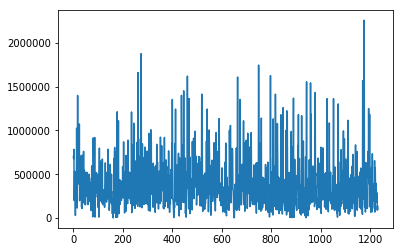

In [137]:
y.plot()